In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
superstore = pd.read_csv("C:/Users/Mishael/Documents/HNG INTERNSHIP PROGRAM/SampleSuperstore.csv/SampleSuperstore.csv")
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [28]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [15]:
superstore.duplicated().sum()

17

In [9]:
superstore[superstore.duplicated()].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780


In [17]:
superstore.drop_duplicates(inplace=True)

In [29]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


## **Quick Insights from Statistics table** 
### **Sales**  
- **Mean Sales:** \$230.15  
- **Std Dev:** \$623.72  
- **Min - Max:** \$0.44 **to** \$22,638.48  
- **Interquartile Range (IQR):** \$17.30 **(25%)** – \$209.97 (75%)  

📌 The Sales distribution is **highly skewed** (large difference between max and mean). A **few high-value sales are driving up the max** (outliers).  
Lastly, **50% of sales transactions are below** ``$54.81``, meaning most transactions are small.  

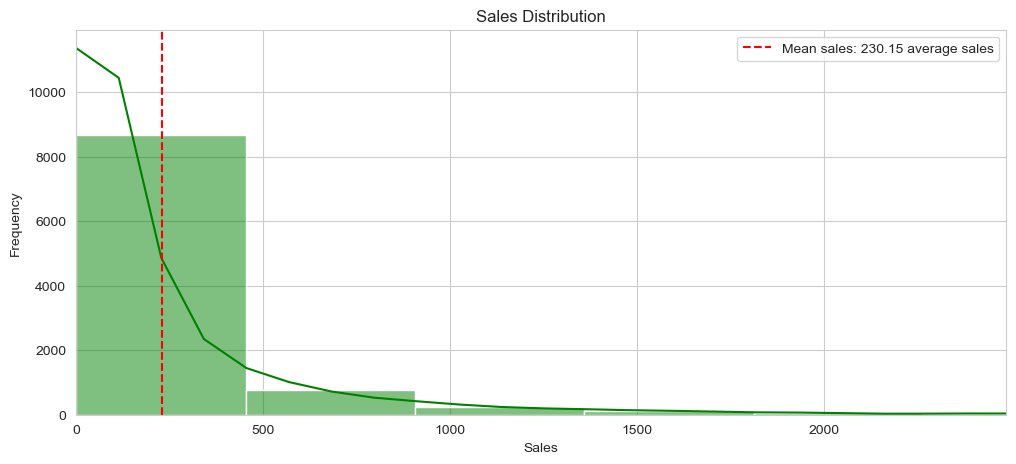

In [97]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 5))
sns.histplot( superstore['Sales'], bins=50, kde=True, color='green')
plt.title("Sales Distribution")
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.axvline(superstore['Sales'].mean(), color='red', linestyle='--', label=f"Mean sales: {superstore['Sales'].mean():.2f} average sales")
plt.xlim(0, superstore['Sales'].quantile(0.99)) 
plt.legend()
plt.show()


### **Profit**  
- **Mean Profit:** \$28.69  
- **Std Dev:** \$234.47  
- **Min - Max:** -\$6,599.97 **to** \$8,399.98  
- **Median Profit:** \$8.67  
- **IQR:** \$1.73 **(25%)** – \$29.36 (75%)  

📌
- **Negative minimum value -\$6,599.97 suggests loss-making transactions**.  
- **Average profit (\$28.66)** is much higher than the median **(\$8.67)** → Profit is **skewed due to a few highly profitable sales**.  
- The high standard deviation suggests **profit values are widely spread**.  

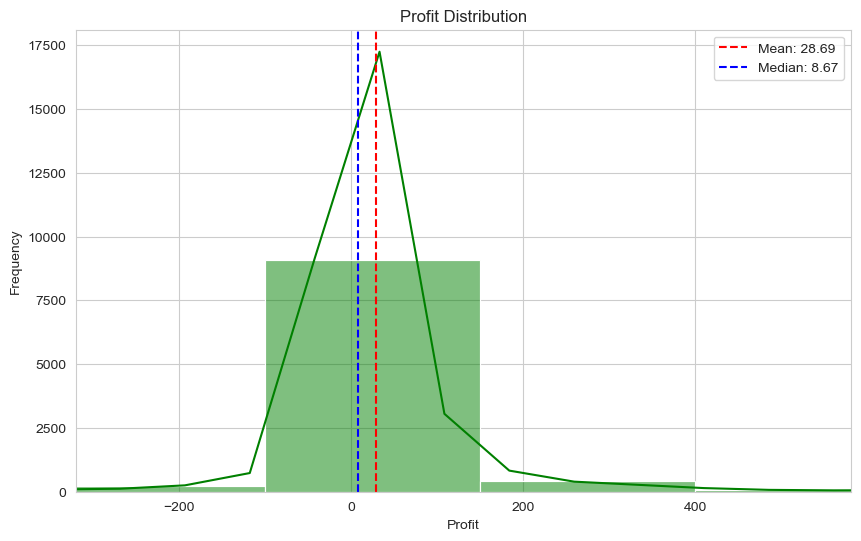

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(superstore['Profit'], bins=60, kde=True, color='green')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.axvline(superstore['Profit'].mean(), color='red', linestyle='--', label=f"Mean: {superstore['Profit'].mean():.2f}")
plt.axvline(superstore['Profit'].median(), color='blue', linestyle='--', label=f"Median: {superstore['Profit'].median():.2f}")
plt.xlim(superstore['Profit'].quantile(0.01), superstore['Profit'].quantile(0.99))
plt.legend()
plt.show()



In [46]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


In [31]:
# Total Sales and Profit
total_sales = superstore['Sales'].sum()
total_profit = superstore['Profit'].sum()

# Average Profit Margin
superstore['Profit Margin'] = superstore['Profit'] / superstore['Sales']
avg_profit_margin = superstore['Profit Margin'].mean()

(total_sales, total_profit, avg_profit_margin)


(2296195.5903, 286241.4226, 0.12011353821539374)

In [107]:
superstore['Profit Margin'].describe()

count    9977.000000
mean        0.120114
std         0.466638
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: Profit Margin, dtype: float64

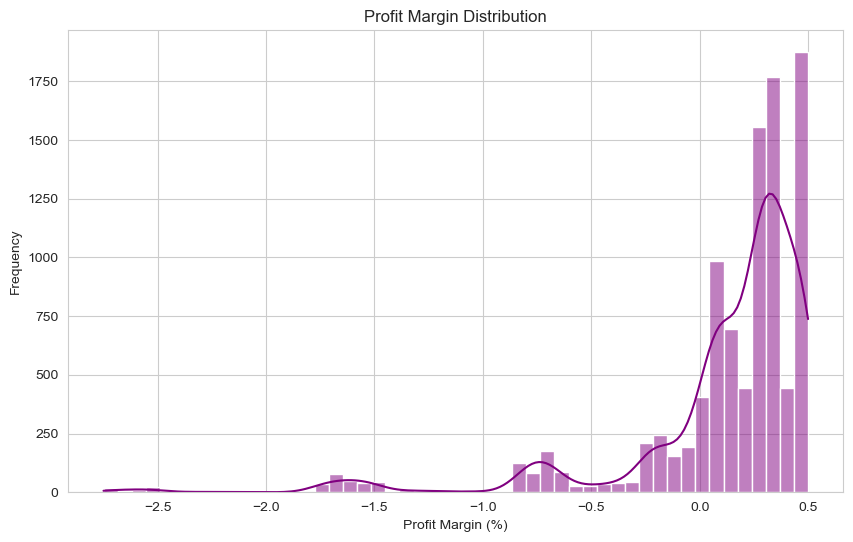

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(superstore['Profit Margin'], bins=50, kde=True, color='purple')
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.show()


## EDA OVERVIEW

- Which Category generate the Most Profit and has the highest Sales?
- Identify the Most Profitable and the Least Profitable Products
- The most purchased product (Sub-category).
- Analyze the Sales and Profit by Region to identify the Profitable region.
- State that generate the most amount of profit
- The most used shipping Mode.
- Distribution of the Category of Product to the differrent shipping mode.
- Which segment generate  the most pprofit and drives the most sales.

In [73]:
# Group by Category and find the product categories with the highest and lowest profit.
category_performance = superstore.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False).reset_index()
category_performance

,Category,Sales,Profit
0,Technology,836154.0330,145454.9481
1,Office Supplies,718735.2440,122364.6608
2,Furniture,741306.3133,18421.8137


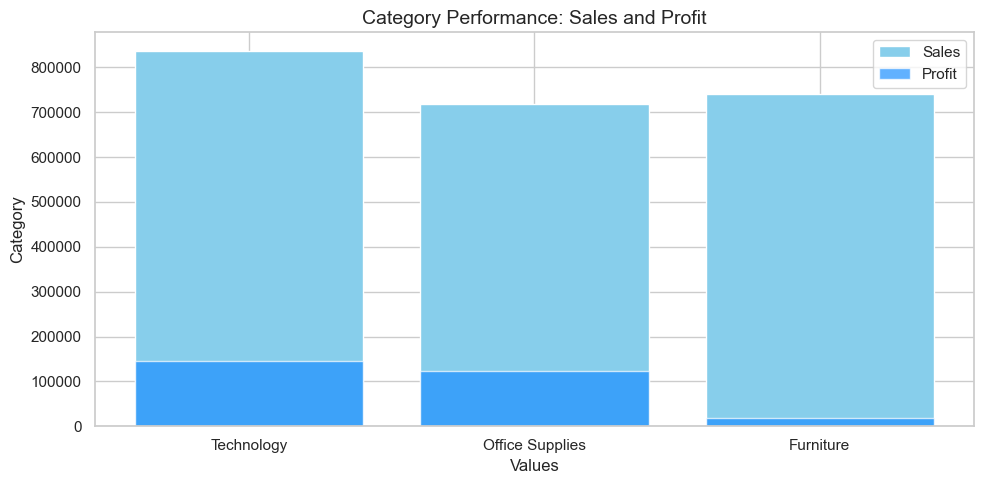

In [299]:
categories = category_performance['Category']
# Data for horizontal bar chart
plt.figure(figsize=(10, 5))
plt.bar(categories, category_performance['Sales'], color='skyblue', label='Sales')
plt.bar(categories, category_performance['Profit'], color='dodgerblue', label='Profit', alpha=0.7)

# Adding labels and title
plt.xlabel('Values', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Category Performance: Sales and Profit', fontsize=14)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [311]:
# Calculate Profit Percent
category_performance['Profit%'] = (category_performance['Profit'] / category_performance['Sales']) * 100

# Display the updated DataFrame
category_performance


,Category,Sales,Profit,Profit Percent,Profit%
0,Technology,836154.0330,145454.9481,17.395712,17.395712
1,Office Supplies,718735.2440,122364.6608,17.024998,17.024998
2,Furniture,741306.3133,18421.8137,2.485047,2.485047


📌`Technology` emerges as the most profitable of the three categories with a profit% of `17.39`, closeby followed by `Office Supplies` at a proofit% of `17.02`

In [296]:
#Identify the Most Profitable and the Least Profitable Products
# Group by Product Name
product_performance = superstore.groupby(['Category','Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

# Most Profitable Products
product_performance.head(10)

Sales      Profit
Category        Sub-Category                        
Technology      Copiers       149528.030  55617.8249
                Phones        330007.054  44515.7306
                Accessories   167380.318  41936.6357
Office Supplies Paper          78224.142  33944.2395
                Binders       203409.169  30228.0003
Furniture       Chairs        327777.761  26567.1278
Office Supplies Storage       223843.608  21278.8264
                Appliances    107532.161  18138.0054
Furniture       Furnishings    91683.024  13052.7230
Office Supplies Envelopes      16476.402   6964.1767

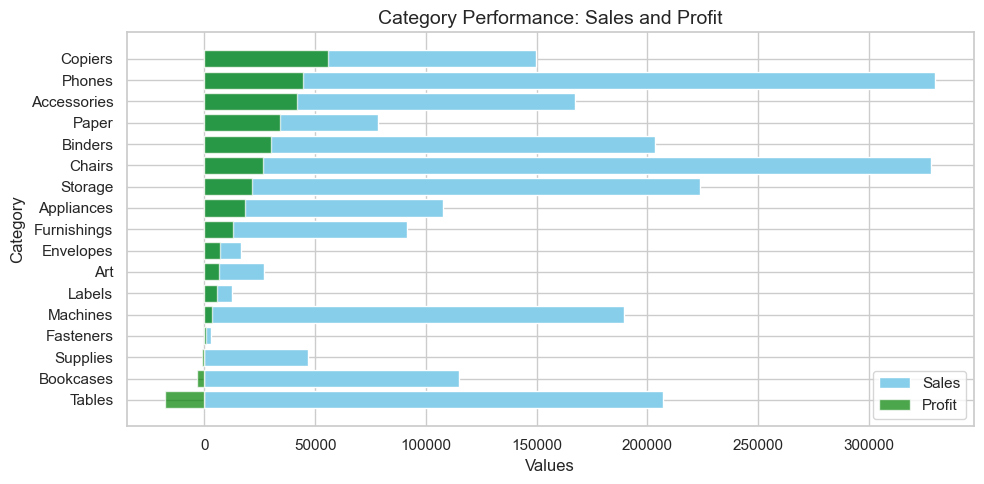

In [372]:
SubCategory = product_performance['Sub-Category']

# Data for horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(SubCategory , product_performance['Sales'], color='skyblue', label='Sales')
plt.barh(SubCategory , product_performance['Profit'], color='green', label='Profit', alpha=0.7)

# Adding labels and title
plt.xlabel('Values', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Category Performance: Sales and Profit', fontsize=14)
plt.legend()
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()

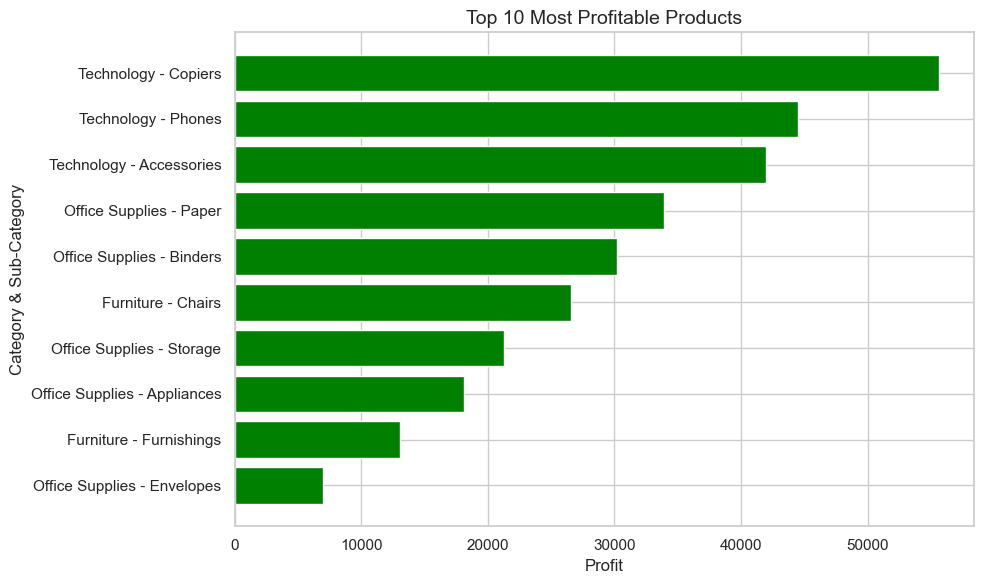

In [297]:
# Top 10 most profitable products
most_profitable = product_performance.head(10)

# create a label
most_profitable = most_profitable.reset_index()
most_profitable['Label'] = most_profitable['Category'] + ' - ' + most_profitable['Sub-Category']

# Plot the table
plt.figure(figsize=(10, 6))
plt.barh(most_profitable['Label'], most_profitable['Profit'], color='green')

# Adding labels and title
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Category & Sub-Category', fontsize=12)
plt.title('Top 10 Most Profitable Products', fontsize=14)
plt.gca().invert_yaxis()  # sort and display the highest profit at the top
plt.tight_layout()
plt.show()


The `Copier` are the most profitable of the sub-catgory under `Technology`, while the `Paper` is the most profitable under `Office supply` and the `Chairs` is the most profitable under `Furniture`.

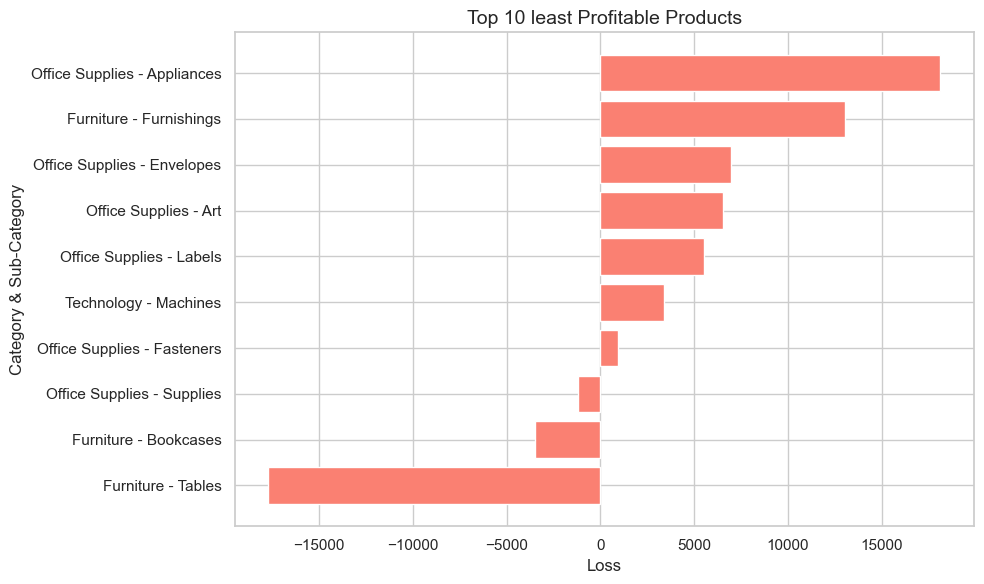

In [298]:
# Top 10 least profitable products
least_profitable = product_performance.tail(10)

# creating label
least_profitable = least_profitable.reset_index()
least_profitable['Label'] = least_profitable['Category'] + ' - ' + least_profitable['Sub-Category']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(least_profitable['Label'], least_profitable['Profit'], color='salmon')

# Adding labels and title
plt.xlabel('Loss', fontsize=12)
plt.ylabel('Category & Sub-Category', fontsize=12)
plt.title('Top 10 least Profitable Products', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In [342]:
# The most purchased product (Sub-category)
Quantity_purchase = superstore.groupby(['Category','Sub-Category']).agg(Quantity=('Quantity','sum')).sort_values(by='Quantity', ascending=False)
Quantity_purchase.head(10) 

Quantity
Category        Sub-Category          
Office Supplies Binders           5971
                Paper             5144
Furniture       Furnishings       3560
Technology      Phones            3289
Office Supplies Storage           3158
                Art               2996
Technology      Accessories       2976
Furniture       Chairs            2351
Office Supplies Appliances        1729
                Labels            1396

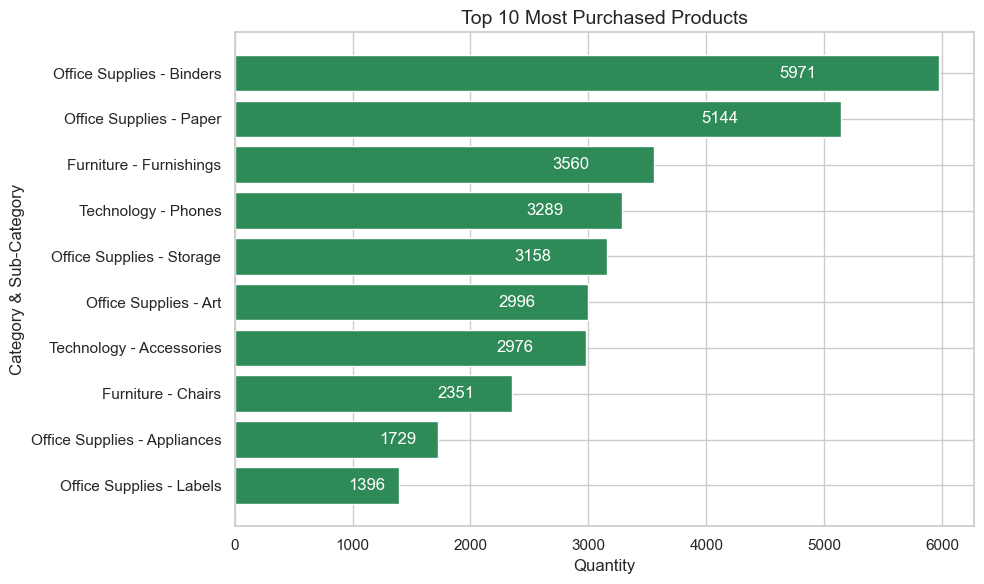

In [343]:
# Top 10 most pURCHASED products
most_purchased= Quantity_purchase.head(10)

# create a label
most_purchased= most_purchased.reset_index()
most_purchased['Label'] = most_purchased['Category'] + ' - ' + most_purchased['Sub-Category']

# Plot the table
plt.figure(figsize=(10, 6))
plt.barh(most_purchased['Label'], most_purchased['Quantity'], color='seagreen')

# Display the values
for i, value in enumerate(most_purchased.values[:,2]):
    plt.text( value - (value * 0.2), i, str(value), color="white", va='center', ha='center', fontsize=12 )

# Adding labels and title
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Category & Sub-Category', fontsize=12)
plt.title('Top 10 Most Purchased Products', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

While the copier generates the most profit, Phones are the most ordered Product in the sub-catgory under Technology. Similarly, Binders were demanded more than Paper which generated the most profit and lastly,Furnishings were demanded for more than Chairs which brought in more profit.
There are sevearl reasons for this:

### **1️⃣ Low Profit Margins**
- Even if a product sells in high volume, it might have **low profitability per unit**.  
- **Example:** Phones are cheaper and has a **low profit margin**, while a copier is sold at a **higher markup**.  
 

### **2️⃣  Discounting & Promotions**
- Heavy discounts can **reduce** the overall profit despite high sales.  
- **Example:** Phones might have bulk discounts, while copiers are sold at a **higher price per unit**. 

---

In [351]:
superstore[superstore['Sub-Category'].isin(['Copiers', 'Phones'])].groupby('Sub-Category')[['Sales', 'Profit', 'Profit Margin']].mean()


,Sales,Profit,Profit Margin
Sub-Category,,,
Copiers,2198.941618,817.909190,0.317194
Phones,371.211534,50.073938,0.119222


In [352]:
superstore.groupby('Sub-Category')[['Sales', 'Profit', 'Profit Margin']].mean().sort_values(by='Profit Margin', ascending=False)


,Sales,Profit,Profit Margin
Sub-Category,,,
Labels,34.283504,15.224193,0.429525
Paper,57.560075,24.977365,0.425581
Envelopes,64.867724,27.418019,0.423140
Copiers,2198.941618,817.909190,0.317194
Fasteners,13.936774,4.375660,0.299171
Art,34.096896,8.207059,0.251623
Accessories,215.974604,54.111788,0.218210
Furnishings,95.902745,13.653476,0.136906
Phones,371.211534,50.073938,0.119222


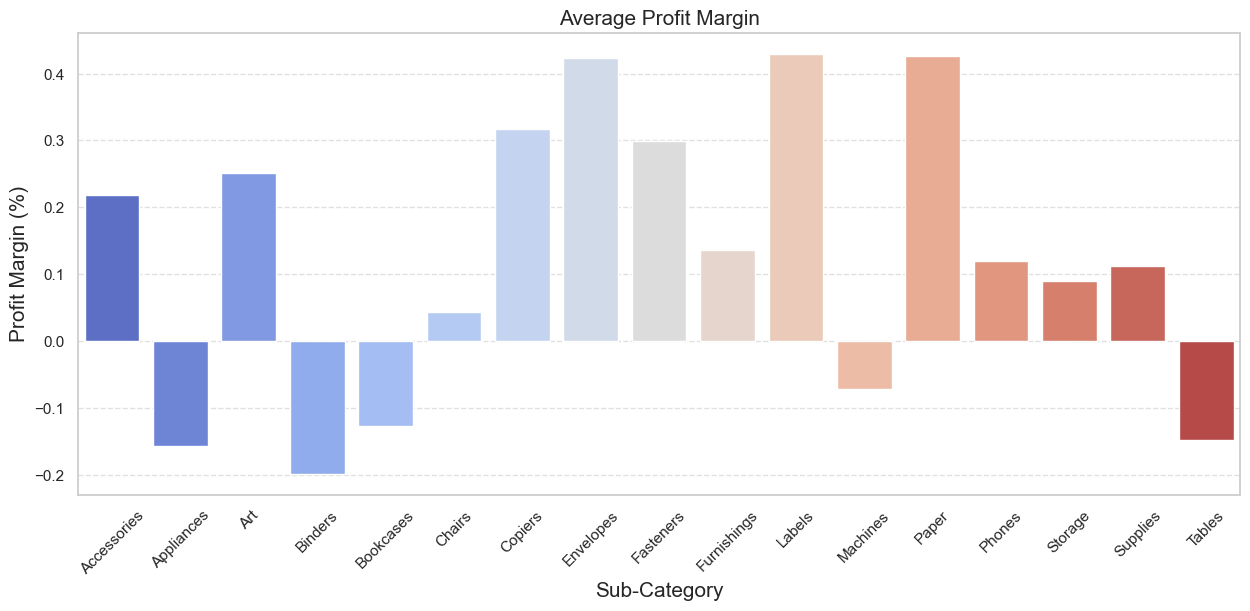

In [370]:

# Calculate mean profit margin for each Sub-Category
profit_margin_data = superstore.groupby('Sub-Category')['Profit Margin'].mean().reset_index()

# Filter for Paper & Biro
#profit_margin_filtered = profit_margin_data[profit_margin_data['Sub-Category']]

# Create a bar plot
plt.figure(figsize=(15,6))
sns.barplot(data=profit_margin_data, x='Sub-Category', y='Profit Margin', palette='coolwarm')

plt.title('Average Profit Margin', fontsize=15)
plt.xlabel('Sub-Category', fontsize=15)
plt.ylabel('Profit Margin (%)', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


From the plot above, we can observe that the Average Profit Margin of Copiers is more than the Phones. The Same with Binders and Paper, and lastly, the same applies to the Furnishing and Chairs.

In [396]:
region_count = superstore.groupby('Region').size().sort_values(ascending=False).reset_index(name='Number of Transactions')
region_count

,Region,Number of Transactions
0,West,3193
1,East,2845
2,Central,2319
3,South,1620


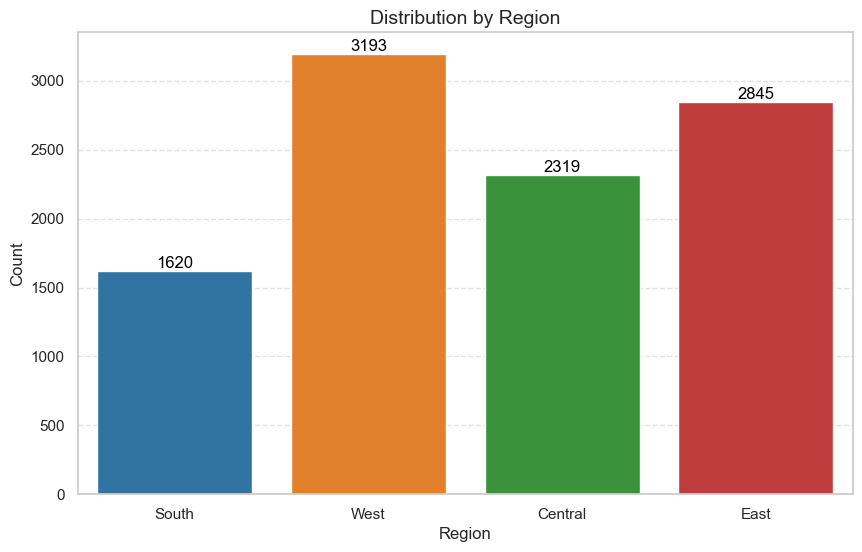

In [398]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=superstore, x='Region', palette='tab10')

# Display the values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution by Region', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

Most of our customers are from the West Region

In [33]:
# Analyze the Sales and Profit by Region to identify the Profitable region.
region_performance = superstore.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False)
region_performance


,Sales,Profit
Region,,
West,725255.6365,108329.8079
East,678435.1960,91506.3092
South,391721.9050,46749.4303
Central,500782.8528,39655.8752


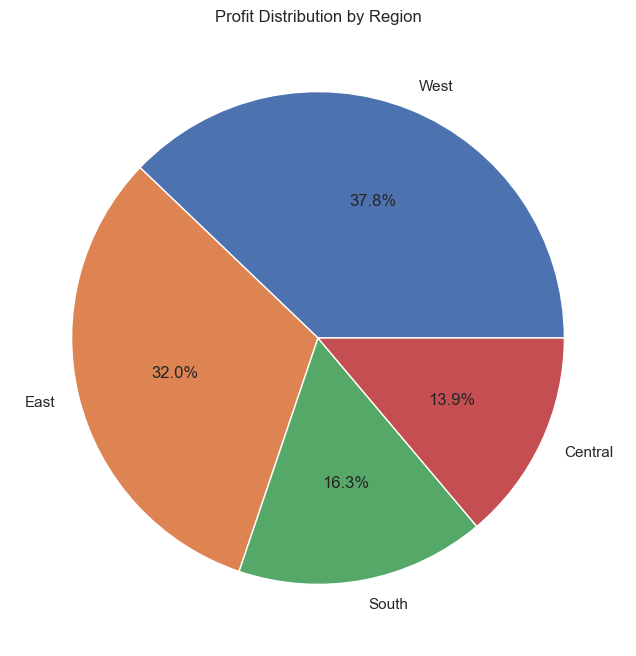

In [145]:
# percentage contribution of each region to the Profit
region_performance['Profit'].plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', legend=False)
plt.title('Profit Distribution by Region')
plt.ylabel('')
plt.show()


In [381]:
#State that generate the most amount of profit
top_States = superstore.groupby(['Region', 'State'])['Profit'].sum().sort_values(ascending=False).reset_index()
top_States.head(10)

,Region,State,Profit
0,West,California,76330.7891
1,East,New York,74015.4622
2,West,Washington,33368.2375
3,Central,Michigan,24428.0903
4,South,Virginia,18597.9504
5,Central,Indiana,18382.9363
6,South,Georgia,16250.0433
7,South,Kentucky,11199.6966
8,Central,Minnesota,10823.1874
9,East,Delaware,9977.3748


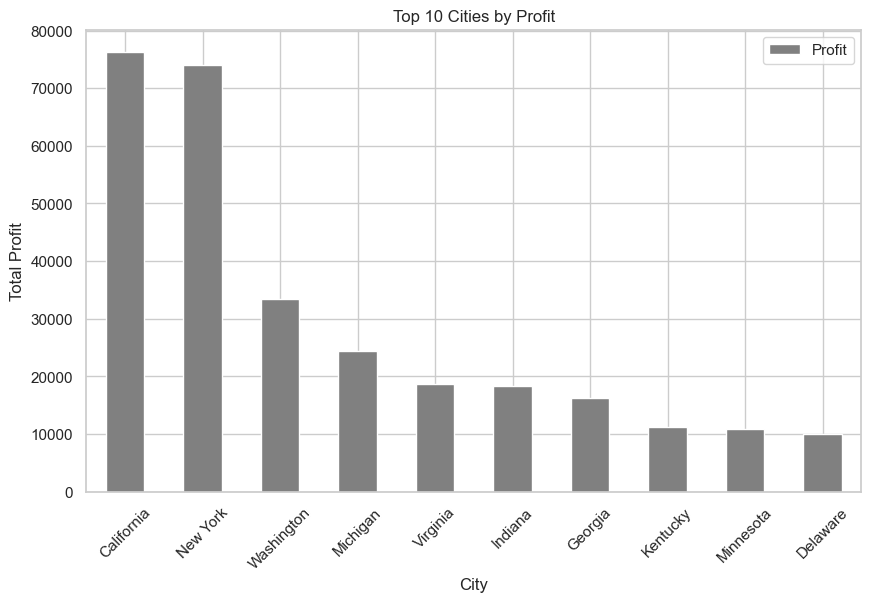

In [382]:
top_States.head(10).plot(kind='bar', x='State', y='Profit', figsize=(10, 6), color='grey')
plt.title('Top 10 Cities by Profit')
plt.ylabel('Total Profit')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


California and New York are the most profitable states, with their profits twice the amount of any consecutive state

In [385]:
# State with the most Discount
top_discount = superstore.groupby('State')['Discount'].mean().sort_values(ascending=False).reset_index()
top_discount.head()

,State,Discount
0,Illinois,0.389206
1,Texas,0.370539
2,Pennsylvania,0.328840
3,Ohio,0.325000
4,Colorado,0.316484


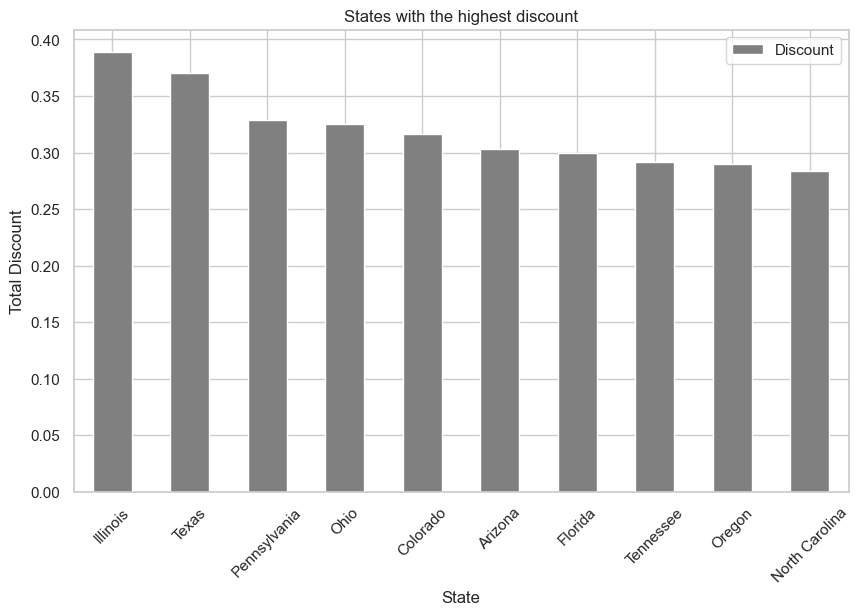

In [384]:
top_discount.head(10).plot(kind='bar', x='State', y='Discount', figsize=(10, 6), color='grey')
plt.title('States with the highest discount')
plt.ylabel('Total Discount')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

On average `Illinois, Texas, Pennsylvania, Ohio and Colorado` are the top 5 States that offers more discount per transaction (per product sold)

In [227]:
# Most profitable  cities
# Top 10 Cities by Profit
top_cities = superstore.groupby('City')['Profit'].sum().sort_values(ascending=False).reset_index()
top_cities.head(10)

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


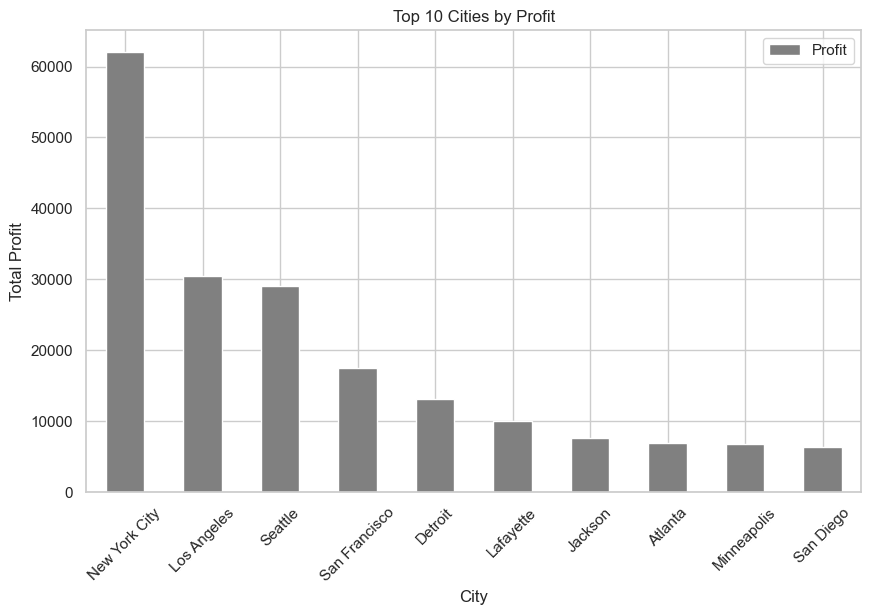

In [211]:
top_cities.head(10).plot(kind='bar', x='City', y='Profit', figsize=(10, 6), color='grey')
plt.title('Top 10 Cities by Profit')
plt.ylabel('Total Profit')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


`New York City` generates more profit than twice the subsequent city (Los Angeles)

In [204]:
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


In [230]:
# the most used shipping Mode
shipping = superstore.groupby('Ship Mode')['Quantity'].sum().sort_values(ascending=False).reset_index()
shipping 

,Ship Mode,Quantity
0,Standard Class,22756
1,Second Class,7418
2,First Class,5690
3,Same Day,1956


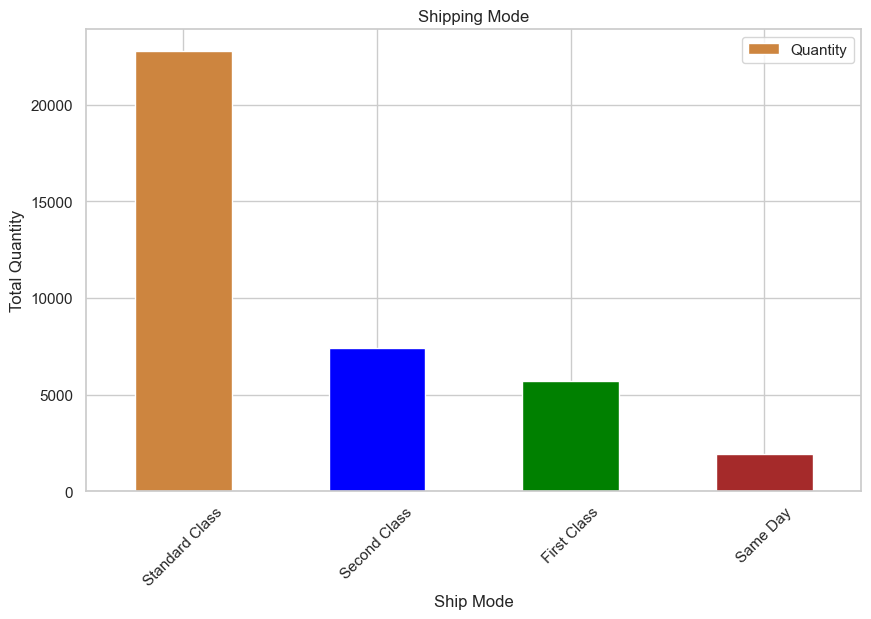

In [388]:
colors = ['peru', 'blue', 'green', 'brown']
shipping.plot(kind='bar', x='Ship Mode', y='Quantity', figsize=(10, 6), color=colors)
plt.title('Shipping Mode')
plt.ylabel('Total Quantity')
plt.xlabel('Ship Mode')
plt.xticks(rotation=45)
plt.show()

In [315]:
# Distribution of the Category of Prooduct to the differrent shipping mode
ShipMode_Cat= superstore.groupby(['Ship Mode', 'Category'])['Quantity'].sum().reset_index()
ShipMode_Cat.sort_values(by='Quantity', ascending=False).head(20)


,Ship Mode,Category,Quantity
10,Standard Class,Office Supplies,13874
9,Standard Class,Furniture,4760
7,Second Class,Office Supplies,4475
11,Standard Class,Technology,4122
1,First Class,Office Supplies,3369
6,Second Class,Furniture,1569
8,Second Class,Technology,1374
0,First Class,Furniture,1238
4,Same Day,Office Supplies,1143
2,First Class,Technology,1083


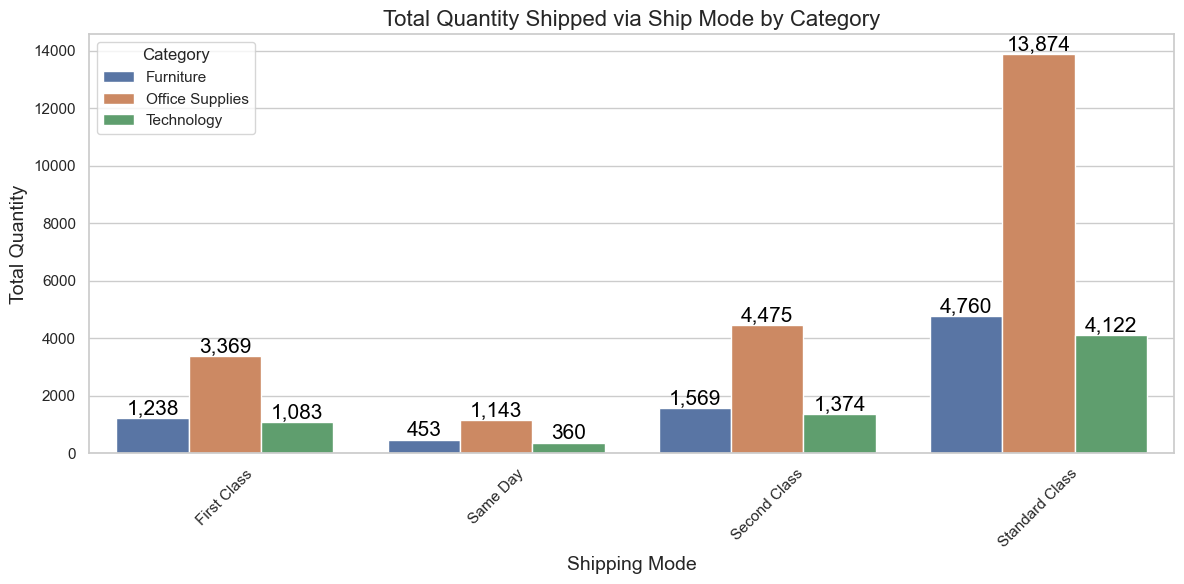

In [269]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=ShipMode_Cat, x='Ship Mode', y='Quantity', hue='Category')

# Add titles and labels
plt.title('Total Quantity Shipped via Ship Mode by Category', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=14)  # Fixed spelling of "Shipping"
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(rotation=45)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=15, color='black', 
                      rotation=0)

plt.legend(title='Category')
plt.tight_layout()
plt.show()


The `Standard Class` is the most used shipping mode as it dominate the other shipping mode in the transpoation of all category class.

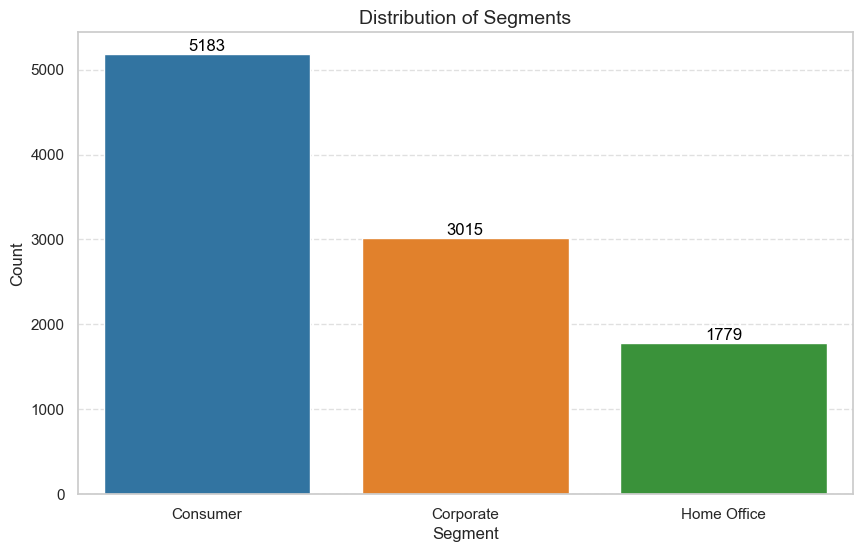

In [328]:
# Which segment generate the most profit and drives the most sales
plt.figure(figsize=(10, 6))

# Use countplot instead of histplot since 'Segment' is categorical
ax = sns.countplot(data=superstore, x='Segment', palette='tab10')

# Display the values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Segments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


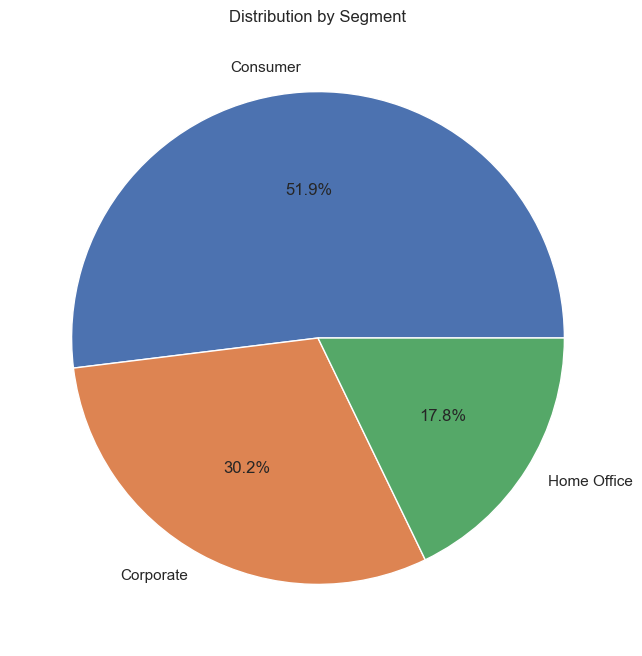

In [389]:
superstore['Segment'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', legend=False)
plt.title('Distribution by Segment')
plt.ylabel('')
plt.show()

In [390]:
Segment_data = superstore.groupby(['Segment'])[['Sales', 'Profit', 'Discount']].sum()
Segment_data 

,Sales,Profit,Discount
Segment,,,
Consumer,1.160833e+06,134007.4413,820.51
Corporate,7.060701e+05,91954.9798,476.85
Home Office,4.292927e+05,60279.0015,261.83


The Consumer generate is the most profitable amongst the three segment.

## INSIGHT
---

This report uncovers several key factors contributing to profitability and sales patterns across the superstore dataset. While Technology and Office Supplies lead in overall profitability, product demand doesn't always align with profitability due to varying profit margins and discounting strategies. Phones and Binders, despite their high demand, offer lower profit margins compared to their counterparts like Copiers and Paper.

Additionally, the regional distribution of profits, particularly in California and New York, suggests a need to focus efforts on these high-performing areas while addressing the impact of discounting in other states such as Illinois and Texas. The Consumer segment continues to be the most profitable, and shipping strategies could be refined to leverage Standard Class for cost efficiency.

Ultimately, businesses should consider adjusting their pricing strategies, managing discounting tactics, and focusing on higher-margin products to enhance profitability. There is also an opportunity to target the West Region more effectively and explore potential customer segments and regional dynamics for growth.